<a href="https://colab.research.google.com/github/Angeal13/client_clustering/blob/main/29_Nov_AAAAABank.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

`Description`

Bank wants to focus on its credit card customer base in the next financial year. They have been advised by their marketing research team, that the penetration in the market can be improved. Based on this input, the Marketing team proposes to run personalized campaigns to target new customers as well as upsell to existing customers. Another insight from the market research was that the customers perceive the support services of the back poorly. Based on this, the Operations team wants to upgrade the service delivery model, to ensure that customers queries are resolved faster. Head of Marketing and Head of Delivery both decide to reach out to the Data Science team for help

`Objective`

To identify different segments in the existing customer based on their spending patterns as well as past interaction with the bank.

`DataSet`

 AAAAA bank

`Data Description`

Data is of various customers of a bank with their credit limit, the total number of credit cards the customer has, and different channels through which customer has contacted the bank for any queries, different channels include visiting the bank, online and through a call centre.


#Imports

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
%matplotlib inline
import seaborn as sns
from sklearn.model_selection  import train_test_split
from sklearn.cluster import KMeans    #Import Kmeans
from scipy.stats import zscore   #import Zscore
#import sklearn.metrics
from sklearn.decomposition import PCA
from scipy.cluster.hierarchy import cophenet, dendrogram, linkage
from sklearn.preprocessing import StandardScaler
from scipy.spatial.distance import cdist
from scipy.spatial.distance import pdist
from sklearn.cluster import *
from sklearn.metrics import silhouette_score
from yellowbrick.cluster import KElbowVisualizer, SilhouetteVisualizer
from sklearn.impute import KNNImputer

In [ ]:
data=pd.read_excel('/content/drive/MyDrive/Work Assignment /29_Nov/Assignment Nov 29/Credit Card Customer Data.xlsx')
data.head(5)

,Sl_No,Customer Key,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
0,1,87073,100000,2,1,1,0
1,2,38414,50000,3,0,10,9
2,3,17341,50000,7,1,3,4
3,4,40496,30000,5,1,1,4
4,5,47437,100000,6,0,12,3


In [ ]:
data.shape

(660, 7)

In [ ]:
data.nunique()

Sl_No                  660
Customer Key           655
Avg_Credit_Limit       110
Total_Credit_Cards      10
Total_visits_bank        6
Total_visits_online     16
Total_calls_made        11
dtype: int64

In [ ]:
data.isnull().sum()

Sl_No                  0
Customer Key           0
Avg_Credit_Limit       0
Total_Credit_Cards     0
Total_visits_bank      0
Total_visits_online    0
Total_calls_made       0
dtype: int64

In [ ]:
data_mod=data.drop(['Customer Key','Sl_No'],axis=1)

In [ ]:
data_mod.head(5)

,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
0,100000,2,1,1,0
1,50000,3,0,10,9
2,50000,7,1,3,4
3,30000,5,1,1,4
4,100000,6,0,12,3


#EDA

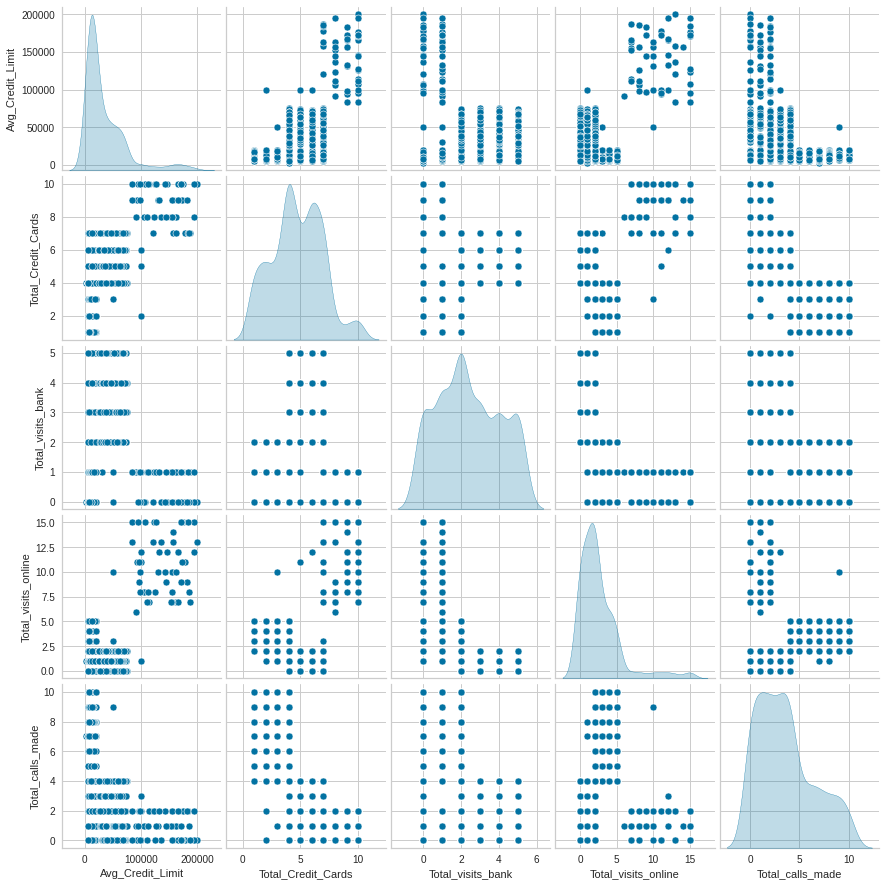

In [ ]:
sns.pairplot(data_mod,diag_kind='kde')

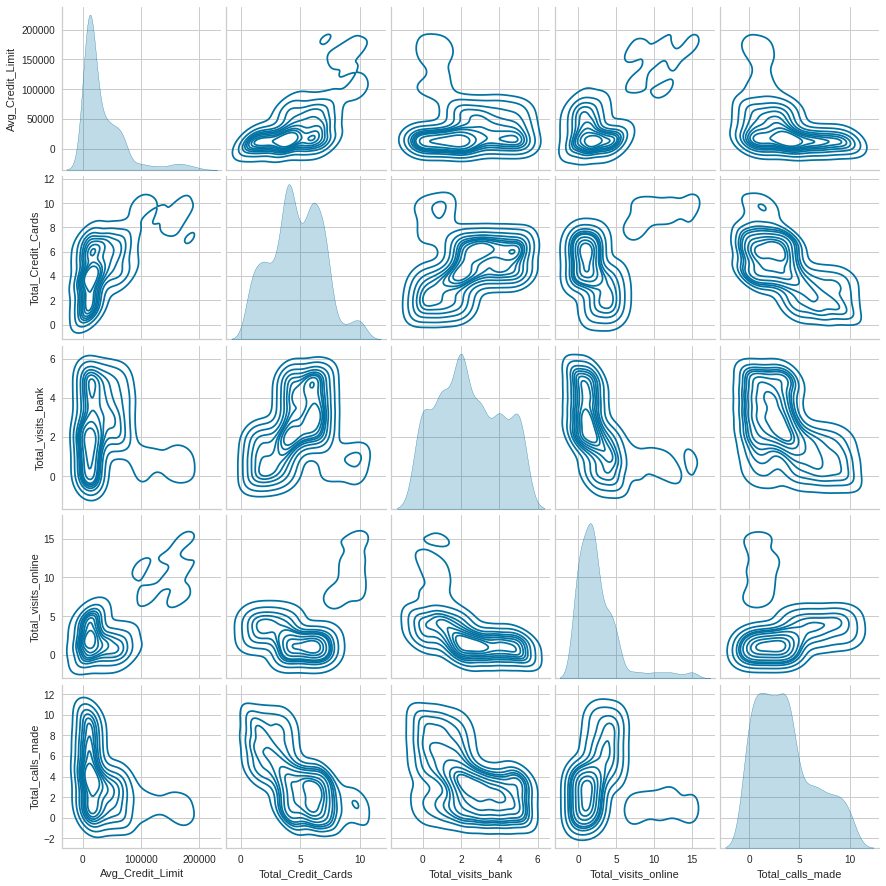

In [ ]:
sns.pairplot(data_mod,kind='kde')

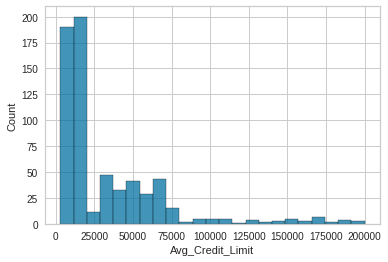

In [ ]:
sns.histplot(data_mod['Avg_Credit_Limit'])

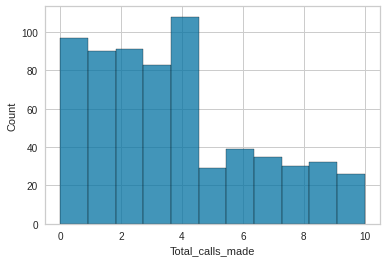

In [ ]:
sns.histplot(data_mod['Total_calls_made'])

In [ ]:
data_mod.columns

Index(['Avg_Credit_Limit', 'Total_Credit_Cards', 'Total_visits_bank',
       'Total_visits_online', 'Total_calls_made'],
      dtype='object')

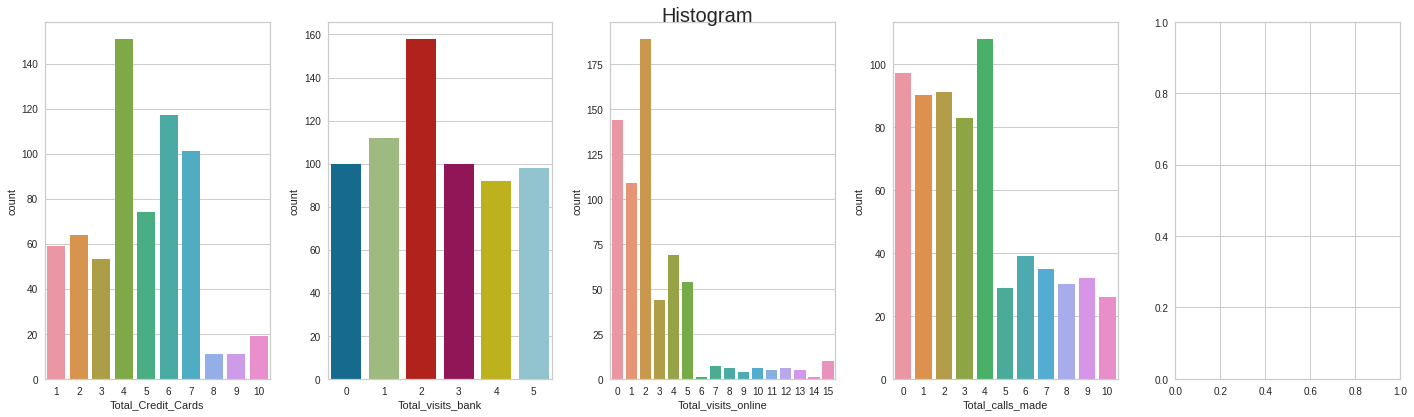

In [ ]:
all_col = data_mod.iloc[:,1:].columns.tolist()
fig, axes = plt.subplots(1, 5,  figsize=(20, 6))
fig.suptitle('Histogram', fontsize=20)
counter = 0
for ii in range(len(all_col)):
    sns.countplot(ax=axes[ii],x=data_mod[all_col[counter]])
    counter = counter+1

fig.tight_layout(pad=2.0)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


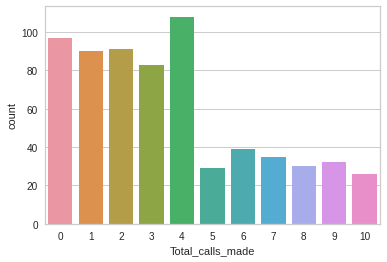

In [ ]:
sns.countplot(data_mod['Total_calls_made'])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


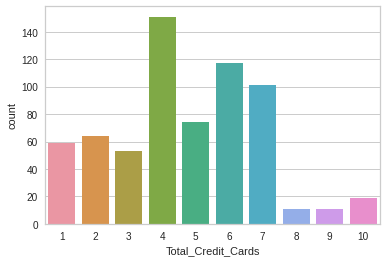

In [ ]:
sns.countplot(data_mod['Total_Credit_Cards'])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


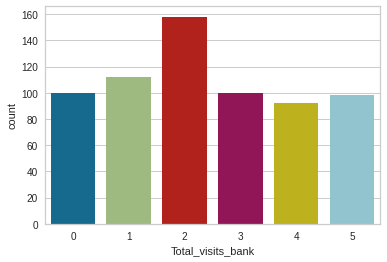

In [ ]:
sns.countplot(data_mod['Total_visits_bank'])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


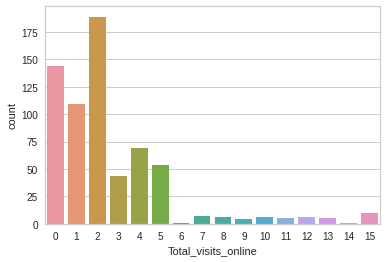

In [ ]:
sns.countplot(data_mod['Total_visits_online'])

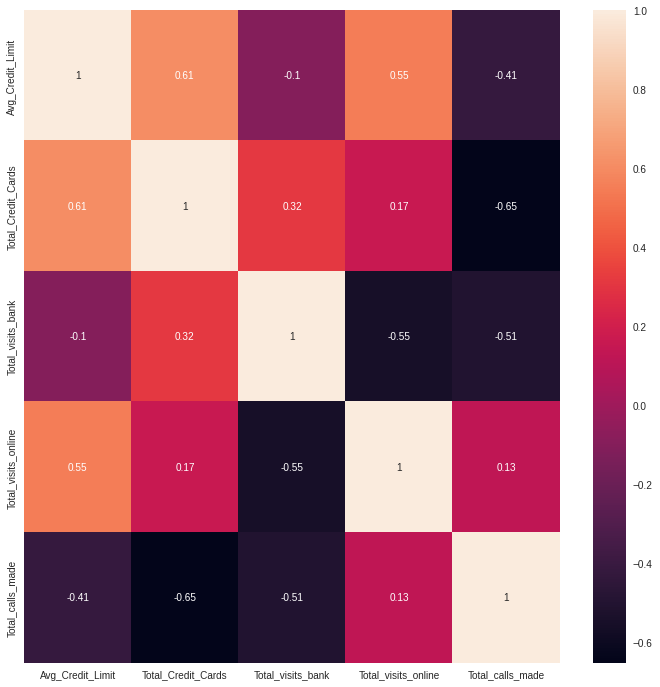

In [ ]:
plt.figure(figsize=(12,12))

sns.heatmap(data_mod.corr(), annot=True, cbar=True)

#KNN Clusterring

##Mean Ditributions

In [ ]:
scaler=StandardScaler()
subset=data_mod[all_col].copy()
subset_scaled=scaler.fit_transform(subset)

In [ ]:
subset_scaled_df=pd.DataFrame(subset_scaled,columns=subset.columns)

Number Of Clusters 1 	Average Distoriton 1.8259548346750438
Number Of Clusters 2 	Average Distoriton 1.2738379735051664
Number Of Clusters 3 	Average Distoriton 1.0289227488774146
Number Of Clusters 4 	Average Distoriton 0.9143721125447829
Number Of Clusters 5 	Average Distoriton 0.8588259931589542
Number Of Clusters 6 	Average Distoriton 0.816307398060687
Number Of Clusters 7 	Average Distoriton 0.7963747736197483
Number Of Clusters 8 	Average Distoriton 0.7520705766812347


Text(0.5, 1.0, 'Sleceting K with Elbow Method')

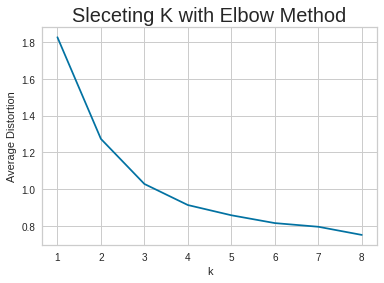

In [ ]:
clusters=range(1,9)
meanDistributions=[]

for k in clusters:
  model=KMeans(n_clusters=k)
  model.fit(subset_scaled_df)
  prediction=model.predict(subset_scaled_df)
  distortion=sum(np.min(cdist(subset_scaled_df,model.cluster_centers_,'euclidean'),axis=1))/subset_scaled_df.shape[0]
  meanDistributions.append(distortion)

  print('Number Of Clusters',k,'\tAverage Distoriton',distortion)

plt.plot(clusters,meanDistributions,'bx-')
plt.xlabel('k')
plt.ylabel('Average Distortion')
plt.title('Sleceting K with Elbow Method',fontsize=20)

##Silhuete Score

In [ ]:
sil_score=[]
cluster_list=list(range(2,10))

for n_clusters in cluster_list:
  clusterer=KMeans(n_clusters=n_clusters)
  preds=clusterer.fit_predict((subset_scaled_df))
  score=silhouette_score(subset_scaled_df,preds)
  sil_score.append(score)
  print('For n_clusters={}, silhuete score is {}'.format(n_clusters,score))

For n_clusters=2, silhuete score is 0.45388735049136736
For n_clusters=3, silhuete score is 0.5429682646592655
For n_clusters=4, silhuete score is 0.3868799639660076
For n_clusters=5, silhuete score is 0.3110862359220408
For n_clusters=6, silhuete score is 0.2834082886786332
For n_clusters=7, silhuete score is 0.27746525875989914
For n_clusters=8, silhuete score is 0.2683634817742666
For n_clusters=9, silhuete score is 0.2525246560989574


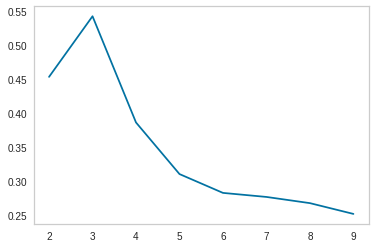

In [ ]:
plt.plot(cluster_list,sil_score)
plt.grid()

3 is my best Value

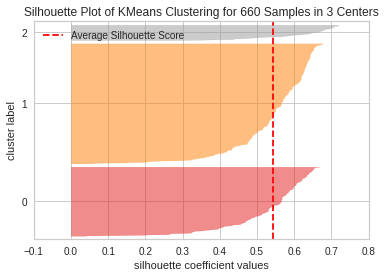

In [ ]:
visualizer=SilhouetteVisualizer(KMeans(3,random_state=1))
visualizer.fit(subset_scaled_df)
visualizer.show()

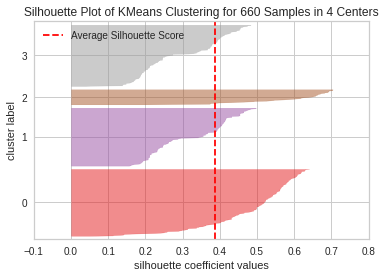

In [ ]:
visualizer=SilhouetteVisualizer(KMeans(4,random_state=1))
visualizer.fit(subset_scaled_df)
visualizer.show()

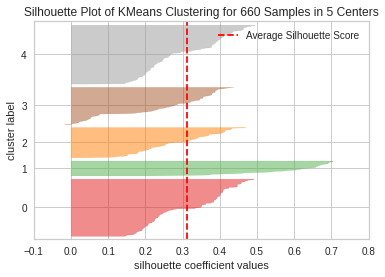

In [ ]:
visualizer=SilhouetteVisualizer(KMeans(5,random_state=1))
visualizer.fit(subset_scaled_df)
visualizer.show()

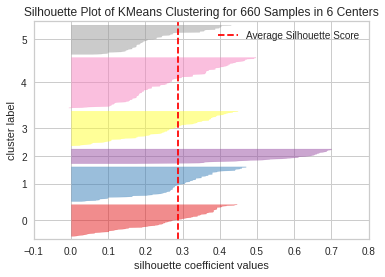

In [ ]:
visualizer=SilhouetteVisualizer(KMeans(6,random_state=1))
visualizer.fit(subset_scaled_df)
visualizer.show()

Take 6 as the aprotpiate number of clusters

In [ ]:
kmeans=KMeans(n_clusters=5,random_state=0)
kmeans.fit(subset_scaled_df)

KMeans(n_clusters=5, random_state=0)

In [ ]:
data_mod['K_means_segment']=kmeans.labels_

In [ ]:
cluster_profile=data_mod.groupby('K_means_segment').mean()


In [ ]:
data_mod.columns

Index(['Avg_Credit_Limit', 'Total_Credit_Cards', 'Total_visits_bank',
       'Total_visits_online', 'Total_calls_made', 'K_means_segment'],
      dtype='object')

In [ ]:
cluster_profile['count_in_each_segment']=data_mod.groupby('K_means_segment')['Avg_Credit_Limit'].count().values

In [ ]:
cluster_profile

,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made,count_in_each_segment
K_means_segment,,,,,,
0,31226.315789,5.478947,4.515789,1.010526,1.936842,190
1,12940.594059,2.455446,0.990099,3.455446,4.970297,101
2,141040.000000,8.740000,0.600000,10.900000,1.080000,50
3,35785.714286,5.561224,2.500000,0.959184,2.081633,196
4,12300.813008,2.357724,0.878049,3.626016,8.398374,123


In [ ]:
cluster_profile['Avg_Credit_Limit']=cluster_profile['Avg_Credit_Limit']/10000

In [ ]:
cluster_profile

,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made,count_in_each_segment
K_means_segment,,,,,,
0,3.122632,5.478947,4.515789,1.010526,1.936842,190
1,1.294059,2.455446,0.990099,3.455446,4.970297,101
2,14.104000,8.740000,0.600000,10.900000,1.080000,50
3,3.578571,5.561224,2.500000,0.959184,2.081633,196
4,1.230081,2.357724,0.878049,3.626016,8.398374,123


In [ ]:
cluster_profile_mod=cluster_profile.copy()

In [ ]:
cluster_profile_mod=cluster_profile_mod.drop('count_in_each_segment',axis=1)

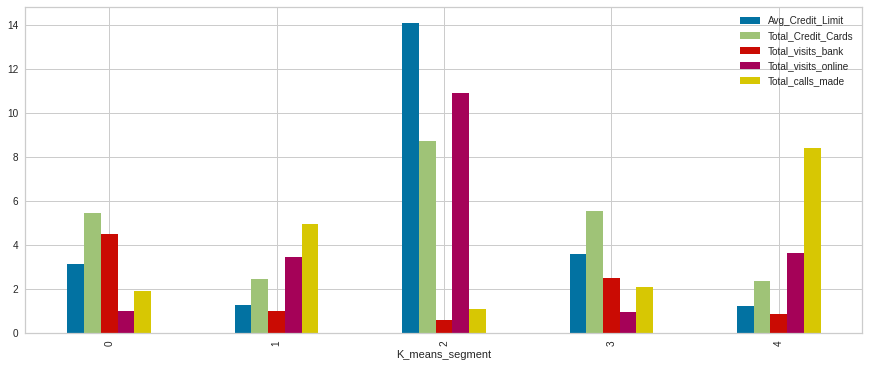

In [ ]:
cluster_profile_mod.groupby('K_means_segment').mean().plot.bar(figsize=(15,6))

#Hierarchial Clustering

In [ ]:
model=AgglomerativeClustering(n_clusters=5,affinity='euclidean',linkage='average')

In [ ]:
model.fit(subset_scaled_df)

AgglomerativeClustering(linkage='average', n_clusters=5)

In [ ]:
subset_scaled_df['lables']=model.labels_
subset_scaled_df.head(5)

,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made,lables
0,-1.249225,-0.860451,-0.547490,-1.251537,4
1,-0.787585,-1.473731,2.520519,1.891859,3
2,1.058973,-0.860451,0.134290,0.145528,2
3,0.135694,-0.860451,-0.547490,0.145528,1
4,0.597334,-1.473731,3.202298,-0.203739,0


In [ ]:
clusters=subset_scaled_df.groupby(['lables'])

In [ ]:
clusters.mean()

,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
lables,,,,
0,1.862226,-1.105763,2.827319,-0.874330
1,-1.059138,-0.896526,0.317846,1.161719
2,0.376706,0.671953,-0.552802,-0.551191
3,-0.787585,-1.473731,2.520519,1.891859
4,-1.095345,-1.269304,-0.433860,-0.902271


In [ ]:
Z=linkage(subset_scaled_df,metric='euclidean',method='average')
c,coph_dists=cophenet(Z,pdist(subset_scaled_df))

c

0.8980790755149195

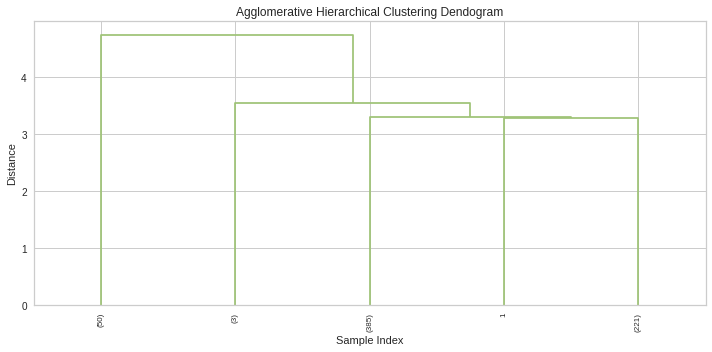

In [ ]:
plt.figure(figsize=(10,5))
plt.title('Agglomerative Hierarchical Clustering Dendogram')
plt.xlabel('Sample Index')
plt.ylabel('Distance')
dendrogram(Z,leaf_rotation=90.,color_threshold=40,leaf_font_size=8.,p=5,truncate_mode='lastp')
plt.tight_layout()

In [ ]:
Z=linkage(subset_scaled_df,metric='euclidean',method='complete')
c,coph_dists=cophenet(Z,pdist(subset_scaled_df))
c

0.8797538447004236

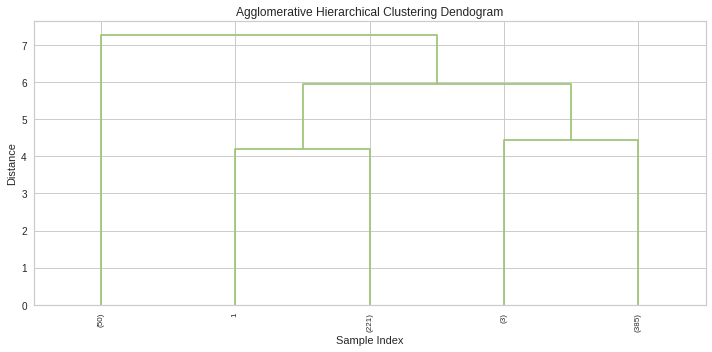

In [ ]:
plt.figure(figsize=(10,5))
plt.title('Agglomerative Hierarchical Clustering Dendogram')
plt.xlabel('Sample Index')
plt.ylabel('Distance')
dendrogram(Z,leaf_rotation=90.,color_threshold=40,leaf_font_size=8.,p=5,truncate_mode='lastp')
plt.tight_layout()

In [ ]:
Z = linkage(subset_scaled_df, metric='euclidean', method='ward')
c, coph_dists = cophenet(Z , pdist(subset_scaled_df))

c

0.7973014785478841

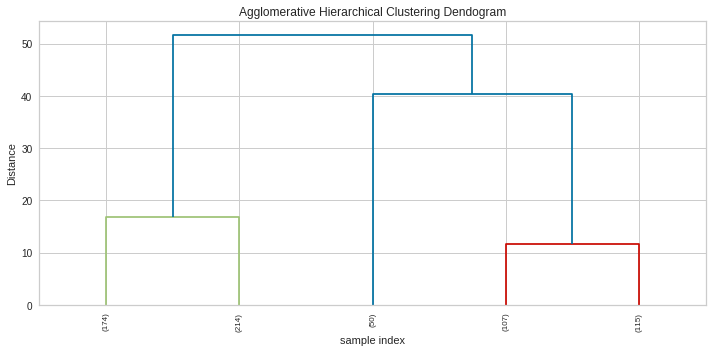

In [ ]:
plt.figure(figsize=(10, 5))
plt.title('Agglomerative Hierarchical Clustering Dendogram')
plt.xlabel('sample index')
plt.ylabel('Distance')
dendrogram(Z,leaf_rotation=90.,color_threshold=40,leaf_font_size=8.,p=5,truncate_mode='lastp')
plt.tight_layout()

#PCA 

In [ ]:
subset_scaled_df

,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made,lables
0,-1.249225,-0.860451,-0.547490,-1.251537,4
1,-0.787585,-1.473731,2.520519,1.891859,3
2,1.058973,-0.860451,0.134290,0.145528,2
3,0.135694,-0.860451,-0.547490,0.145528,1
4,0.597334,-1.473731,3.202298,-0.203739,0
...,...,...,...,...,...
655,2.443892,-0.860451,2.520519,-1.251537,0
656,2.443892,-0.860451,3.543188,-0.553005,0
657,1.520613,-0.860451,2.179629,-0.902271,0
658,2.443892,-0.860451,4.224968,-1.251537,0


In [ ]:
X=subset_scaled_df.drop('lables',axis=1)
Xscaled=X.apply(zscore)
Xscaled.head(10)

,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
0,-1.249225,-0.860451,-0.547490,-1.251537
1,-0.787585,-1.473731,2.520519,1.891859
2,1.058973,-0.860451,0.134290,0.145528
3,0.135694,-0.860451,-0.547490,0.145528
4,0.597334,-1.473731,3.202298,-0.203739
5,-0.787585,-1.473731,-0.547490,1.542593
6,0.135694,-1.473731,2.861408,-0.553005
7,-0.787585,-1.473731,-0.547490,-0.902271
8,-1.249225,-1.473731,-0.206600,-0.553005
9,-0.325946,-1.473731,-0.547490,1.193326


In [ ]:
covMatrix = np.cov(Xscaled,rowvar=False)
print(covMatrix)

[[ 1.00151745  0.31627526  0.16801286 -0.65223974]
 [ 0.31627526  1.00151745 -0.55269882 -0.50678371]
 [ 0.16801286 -0.55269882  1.00151745  0.12749255]
 [-0.65223974 -0.50678371  0.12749255  1.00151745]]


In [ ]:
pca = PCA(n_components=3)  #We create the model and compute it with scaled data. we will use all the 6 components, 6x6 matrix
pca.fit(Xscaled)

PCA(n_components=3)

In [ ]:
print(pca.explained_variance_)

[2.07793007 1.33478489 0.32055171]


In [ ]:
print(pca.components_)

[[-0.48433212 -0.57126172  0.28838575  0.59658705]
 [ 0.53279498 -0.33836795  0.73530658 -0.24690256]
 [-0.28235331 -0.61466343 -0.30358583 -0.6710448 ]]


In [ ]:
print(pca.explained_variance_ratio_)

[0.51869542 0.33319062 0.08001651]


In [ ]:
Xpca=pca.transform(Xscaled)

In [ ]:
Xpca

array([[ 0.19204298, -0.46799676,  1.88765803],
       [ 3.07887886,  1.46529097, -0.90649007],
       [ 0.10419491,  0.91817769,  0.09145886],
       ...,
       [-0.15464855,  2.92679227,  0.04329739],
       [-0.22034348,  5.00889666, -0.60395614],
       [ 0.47539903,  4.04600671, -0.25492844]])

##Kmeans PCA

Number Of Clusters 1 	Average Distoriton 1.7321185619015207
Number Of Clusters 2 	Average Distoriton 1.137431506682622
Number Of Clusters 3 	Average Distoriton 0.8780822391540439
Number Of Clusters 4 	Average Distoriton 0.7726093681465118
Number Of Clusters 5 	Average Distoriton 0.71176833860153
Number Of Clusters 6 	Average Distoriton 0.6662020691609113
Number Of Clusters 7 	Average Distoriton 0.6426484884234326
Number Of Clusters 8 	Average Distoriton 0.6125412448530011


Text(0.5, 1.0, 'Selecting K with Elbow Method')

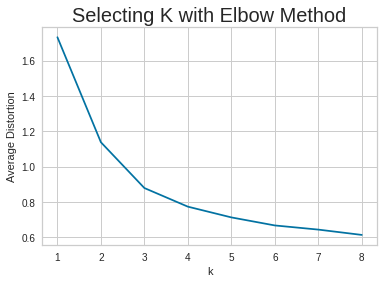

In [ ]:
clusters=range(1,9)
meanDistributions=[]

for k in clusters:
  model=KMeans(n_clusters=k)
  model.fit(Xpca)
  prediction=model.predict(Xpca)
  distortion=sum(np.min(cdist(Xpca,model.cluster_centers_,'euclidean'),axis=1))/Xpca.shape[0]
  meanDistributions.append(distortion)

  print('Number Of Clusters',k,'\tAverage Distoriton',distortion)

plt.plot(clusters,meanDistributions,'bx-')
plt.xlabel('k')
plt.ylabel('Average Distortion')
plt.title('Selecting K with Elbow Method',fontsize=20)

In [ ]:
k_means_pca=KMeans(5)
k_means_pca.fit(Xpca)
prediction=k_means_pca.predict(Xpca)

subset_scaled_df['Group']=prediction
data_mod['Group']=prediction
subset_scaled_df.head(5)

,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made,lables,Group
0,-1.249225,-0.860451,-0.547490,-1.251537,4,0
1,-0.787585,-1.473731,2.520519,1.891859,3,4
2,1.058973,-0.860451,0.134290,0.145528,2,0
3,0.135694,-0.860451,-0.547490,0.145528,1,0
4,0.597334,-1.473731,3.202298,-0.203739,0,2


In [ ]:
kmeans_clusters=data_mod.groupby(['Group'])
means=kmeans_clusters.mean()
means

,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made,K_means_segment
Group,,,,,,
0,35530.516432,5.347418,2.633803,1.023474,1.934272,2.680751
1,12083.333333,2.583333,0.908333,3.375000,5.366667,1.500000
2,141040.000000,8.740000,0.600000,10.900000,1.080000,2.000000
3,31488.505747,5.712644,4.528736,0.936782,2.091954,0.103448
4,12330.097087,2.194175,0.951456,3.776699,8.650485,4.000000


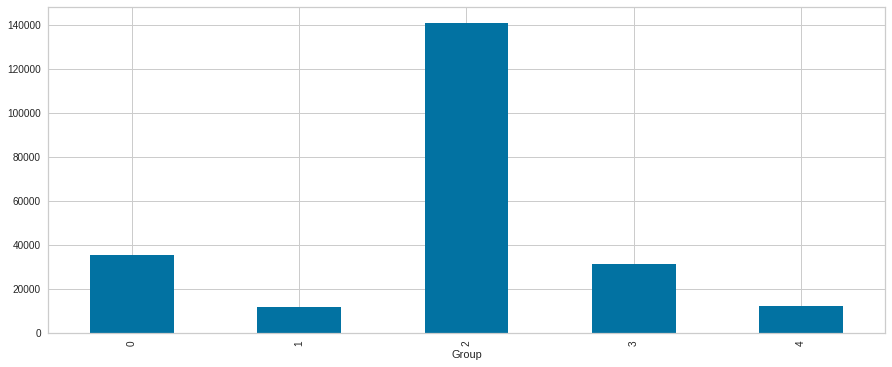

In [ ]:
means['Avg_Credit_Limit'].plot.bar(figsize=(15,6))

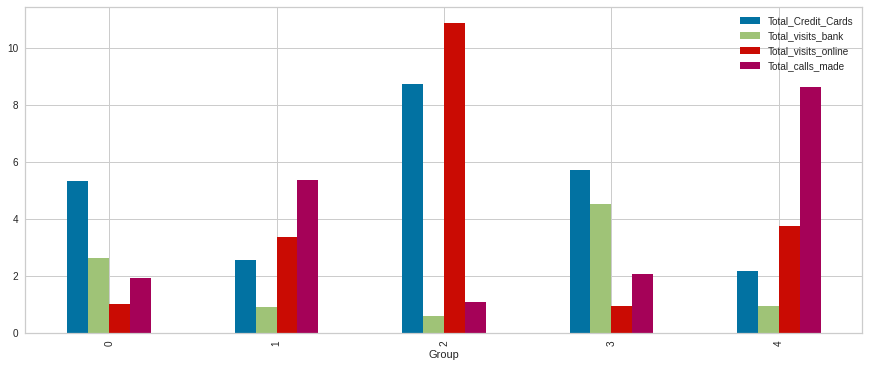

In [ ]:
means.drop(['Avg_Credit_Limit','K_means_segment','count_in_each_segment'],axis=1).plot.bar(figsize=(15,6))

In [ ]:
means['count_in_each_segment']=data_mod.groupby('K_means_segment')['Avg_Credit_Limit'].count().values
means

,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made,K_means_segment,count_in_each_segment
Group,,,,,,,
0,35530.516432,5.347418,2.633803,1.023474,1.934272,2.680751,190
1,12083.333333,2.583333,0.908333,3.375000,5.366667,1.500000,101
2,141040.000000,8.740000,0.600000,10.900000,1.080000,2.000000,50
3,31488.505747,5.712644,4.528736,0.936782,2.091954,0.103448,196
4,12330.097087,2.194175,0.951456,3.776699,8.650485,4.000000,123
